In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Load the cleaned data ---

In [2]:
df = pd.read_csv('./Data/cleaned_housePrice.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3243,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3244,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3245,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3246,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# --- 2. Define Features (X) and Target (y) ---

In [3]:
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
target = 'Price'

# Make sure all required columns exist in the DataFrame
if not all(col in df.columns for col in features + [target]):
    print("Error: One or more required columns are missing from the dataset.")
    exit()

X = df[features]
y = df[target]

# --- 3. Split the data into training and testing sets ---

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Train the Random Forest Regressor Model ---

In [5]:
print("\nTraining the Random Forest model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


Training the Random Forest model...
Model training complete.


# --- 5. Make predictions and evaluate the model ---

In [6]:
y_pred = model.predict(X_test)

print("\n--- Model Evaluation (Random Forest) ---")
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


--- Model Evaluation (Random Forest) ---
R-squared (R2) Score: 0.75
Mean Absolute Error (MAE): 2058082565.52
Mean Squared Error (MSE): 13990618267126687744.00


# --- 6. Visualize Feature Importance ---


--- Generating Feature Importance Plot ---


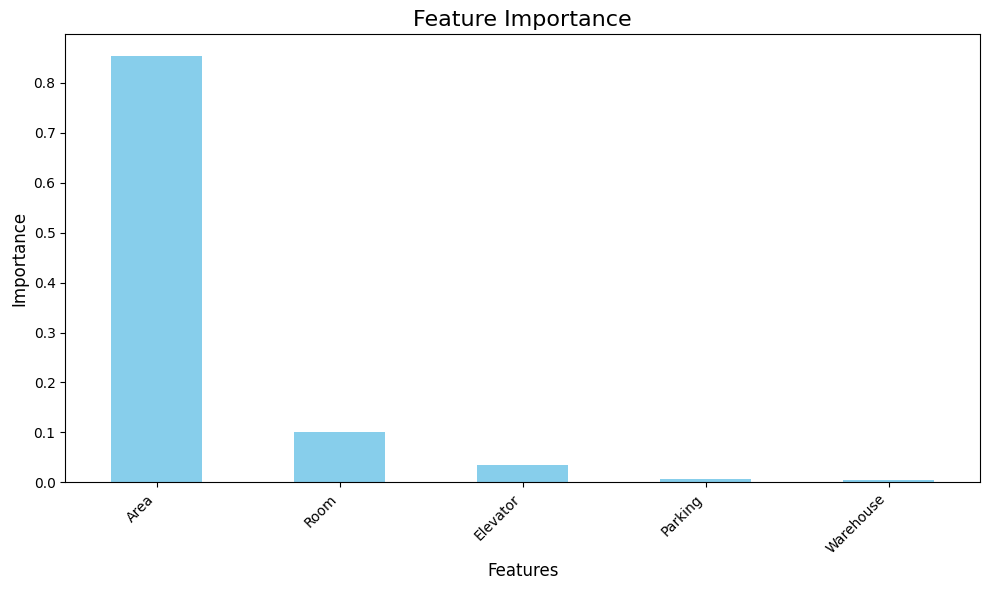

In [7]:
# This helps you understand which features the model found most influential.
print("\n--- Generating Feature Importance Plot ---")
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('feature_importance.png')

In [8]:
print("Feature importance plot saved as 'feature_importance.png'.")

Feature importance plot saved as 'feature_importance.png'.
